# Convolutional Neural Networks: Application

▪️ Create a mood classifer using the TF Keras Sequential API

▪️ Build a ConvNet to identify sign language digits using the TF Keras Functional API

### Packages

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
import os
import cv2

%matplotlib inline
np.random.seed(1)

### Load Dataset

In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("happy_house_dataset_zip/train_happy.h5", "happy_house_dataset_zip/test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


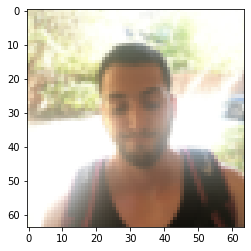

In [5]:
index = 124
plt.imshow(X_train_orig[index]) # display sample training image
plt.show()

### The Sequential API

#### happyModel

Implement the happyModel function below to build the following model: ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE. Take help from tf.keras.layers

In [8]:
def happyModel():

    model = tf.keras.Sequential([
        tf.keras.Input(shape=(64,64,3)),
        ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
        tfl.ZeroPadding2D(padding=3),
        ## Conv2D with 32 7x7 filters and stride of 1
        tfl.Conv2D(filters=32,kernel_size=7,strides=1),
        ## BatchNormalization for axis 3
        tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
        ## ReLU
        tfl.ReLU(),
        ## Max Pooling 2D with default parameters
        tfl.MaxPool2D(),
        ## Flatten Layer
        tfl.Flatten(),
        ## Dense layer with 1 unit for output & "sigmoid" activation
        tfl.Dense(1, activation="sigmoid")
    ])

    return model

In [9]:
happy_model = happyModel()
happy_model.compile(optimizer="adam",
                    loss="binary_crossentropy",
                    metrics = ["accuracy"])

In [10]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

#### Train and Evaluate the Model

In [12]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 6s 103ms/step - loss: 1.2114 - accuracy: 0.7217
Epoch 2/10
38/38 [==============================] - 4s 102ms/step - loss: 0.3120 - accuracy: 0.8633
Epoch 3/10
38/38 [==============================] - 4s 107ms/step - loss: 0.1124 - accuracy: 0.9600
Epoch 4/10
38/38 [==============================] - 4s 103ms/step - loss: 0.1268 - accuracy: 0.9550
Epoch 5/10
38/38 [==============================] - 4s 96ms/step - loss: 0.1376 - accuracy: 0.9450
Epoch 6/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0891 - accuracy: 0.9667
Epoch 7/10
38/38 [==============================] - 4s 96ms/step - loss: 0.1279 - accuracy: 0.9483
Epoch 8/10
38/38 [==============================] - 4s 101ms/step - loss: 0.1427 - accuracy: 0.9517
Epoch 9/10
38/38 [==============================] - 4s 99ms/step - loss: 0.0660 - accuracy: 0.9750
Epoch 10/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0717 - accuracy: 0.9717


In [13]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 64ms/step - loss: 0.1234 - accuracy: 0.9600


[0.12340876460075378, 0.9599999785423279]

### Functional API

#### Load Dataset

In [2]:
import os
import cv2

In [3]:
data = {}
for i in range(10):
    files_list = os.listdir("Dataset/"+str(i))
    data[i] = files_list
data

{0: ['IMG_1118.JPG',
  'IMG_1128.JPG',
  'IMG_1138.JPG',
  'IMG_1148.JPG',
  'IMG_1158.JPG',
  'IMG_1169.JPG',
  'IMG_1179.JPG',
  'IMG_1189.JPG',
  'IMG_1199.JPG',
  'IMG_1209.JPG',
  'IMG_1219.JPG',
  'IMG_1229.JPG',
  'IMG_1239.JPG',
  'IMG_1249.JPG',
  'IMG_1260.JPG',
  'IMG_1270.JPG',
  'IMG_1280.JPG',
  'IMG_1290.JPG',
  'IMG_1301.JPG',
  'IMG_1312.JPG',
  'IMG_1322.JPG',
  'IMG_4040.JPG',
  'IMG_4049.JPG',
  'IMG_4059.JPG',
  'IMG_4069.JPG',
  'IMG_4079.JPG',
  'IMG_4089.JPG',
  'IMG_4099.JPG',
  'IMG_4109.JPG',
  'IMG_4119.JPG',
  'IMG_4129.JPG',
  'IMG_4139.JPG',
  'IMG_4149.JPG',
  'IMG_4159.JPG',
  'IMG_4170.JPG',
  'IMG_4181.JPG',
  'IMG_4193.JPG',
  'IMG_4203.JPG',
  'IMG_4213.JPG',
  'IMG_4223.JPG',
  'IMG_4233.JPG',
  'IMG_4243.JPG',
  'IMG_4254.JPG',
  'IMG_4266.JPG',
  'IMG_4276.JPG',
  'IMG_4286.JPG',
  'IMG_4296.JPG',
  'IMG_4306.JPG',
  'IMG_4316.JPG',
  'IMG_4327.JPG',
  'IMG_4338.JPG',
  'IMG_4348.JPG',
  'IMG_4359.JPG',
  'IMG_4370.JPG',
  'IMG_4381.JPG',
  'IMG_

In [54]:
X = []
Y = []
for key,value in data.items():
    for img in value:
        image = Image.open("Dataset/"+str(key)+"/"+img)
        image = image.resize((64,64))
        X.append(np.asarray(image))
        Y.append(key)

In [55]:
x = np.array(X)
y = np.array(Y)

In [56]:
y = y.reshape(2062,1)

In [57]:
x.shape,y.shape

((2062, 64, 64, 3), (2062, 1))

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(sparse=False), [0])], remainder="passthrough")
y = np.array(ct.fit_transform(y))

In [59]:
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [60]:
y.shape

(2062, 10)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.2)

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 1649
number of test examples = 413
x_train shape: (1649, 64, 64, 3)
y_train shape: (1649, 10)
x_test shape: (413, 64, 64, 3)
y_test shape: (413, 10)


y = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


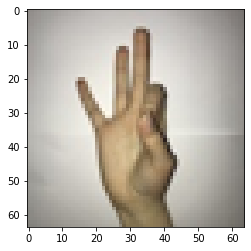

In [62]:
index = 2002
plt.imshow(x[index])
print("y = "+str(np.squeeze(y[index,:])))

#### Convolutional Model

In [63]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(filters= 8. , kernel_size=4 , padding='same',strides=1)(input_img)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='SAME')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters= 16. , kernel_size=2 , padding='same',strides=1)(P1)
    ## RELU
    A2 =  tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='SAME')(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    ## 10 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tfl.Dense(units= 10 , activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [64]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [65]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
26/26 [==============================] - 2s 52ms/step - loss: 33.3966 - accuracy: 0.1219 - val_loss: 8.8717 - val_accuracy: 0.1356
Epoch 2/100
26/26 [==============================] - 1s 44ms/step - loss: 6.3297 - accuracy: 0.1480 - val_loss: 4.3491 - val_accuracy: 0.1671
Epoch 3/100
26/26 [==============================] - 1s 48ms/step - loss: 4.0545 - accuracy: 0.1668 - val_loss: 3.6015 - val_accuracy: 0.1792
Epoch 4/100
26/26 [==============================] - 1s 41ms/step - loss: 3.5162 - accuracy: 0.1783 - val_loss: 3.2309 - val_accuracy: 0.2010
Epoch 5/100
26/26 [==============================] - 1s 40ms/step - loss: 3.1710 - accuracy: 0.2025 - val_loss: 2.9432 - val_accuracy: 0.2179
Epoch 6/100
26/26 [==============================] - 1s 43ms/step - loss: 2.9140 - accuracy: 0.2226 - val_loss: 2.7076 - val_accuracy: 0.2421
Epoch 7/100
26/26 [==============================] - 1s 43ms/step - loss: 2.7185 - accuracy: 0.2365 - val_loss: 2.5391 - val_accuracy: 0.2373
Epoch

In [66]:
history.history

{'loss': [33.3965950012207,
  6.329708576202393,
  4.054499626159668,
  3.516200304031372,
  3.171032190322876,
  2.9140450954437256,
  2.7184650897979736,
  2.5614423751831055,
  2.4321157932281494,
  2.3303654193878174,
  2.231358766555786,
  2.1354002952575684,
  2.0571675300598145,
  1.9826292991638184,
  1.9146766662597656,
  1.8574488162994385,
  1.81342351436615,
  1.7730478048324585,
  1.7319153547286987,
  1.694579005241394,
  1.6597132682800293,
  1.626465082168579,
  1.5950276851654053,
  1.5692627429962158,
  1.5403225421905518,
  1.5212517976760864,
  1.4988360404968262,
  1.475188970565796,
  1.45558500289917,
  1.4522420167922974,
  1.440984845161438,
  1.423426866531372,
  1.4168870449066162,
  1.3898802995681763,
  1.3736218214035034,
  1.3609546422958374,
  1.3470542430877686,
  1.3320344686508179,
  1.3179885149002075,
  1.30686354637146,
  1.2995843887329102,
  1.2921438217163086,
  1.2821576595306396,
  1.2714976072311401,
  1.2630016803741455,
  1.245300531387329,

C:\Users\hp\AppData\Local\Temp\ipykernel_8152\3431861191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8152\3431861191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

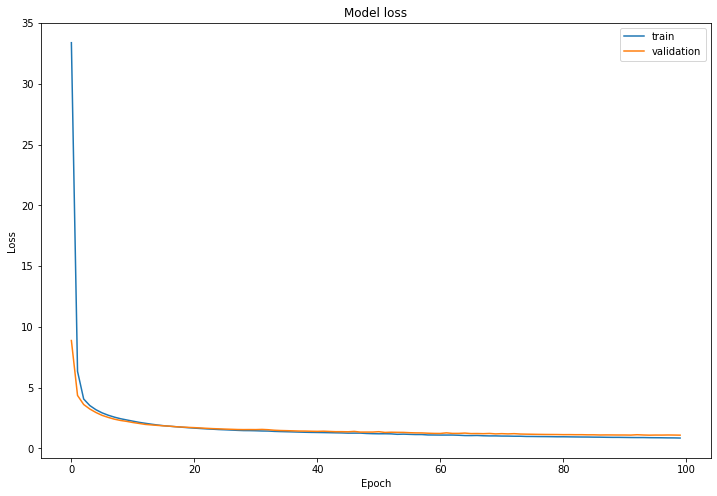

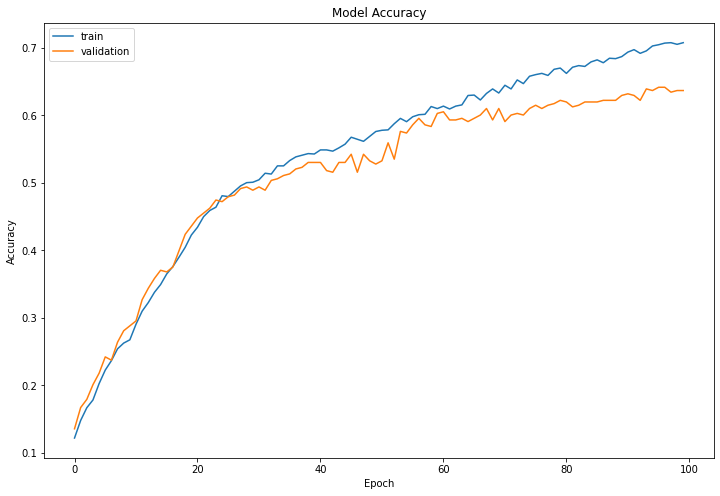

In [67]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')
